In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

In [4]:
def read_sumstats(ss_fname, ss_id, df_dict, usecols=["P"], sep=None):
    if sep:
        df = pd.read_csv(ss_fname, usecols=usecols, sep=sep)
    else:
        df = pd.read_csv(ss_fname, usecols=usecols, delim_whitespace=True)
    df_dict[ss_id] = df

In [8]:
# load sumstats and process if needed
df_dict = {}
pval_col_dict = {}

if True:
    fname = "/ess/p33/cluster/users/alexeas/aud_gwas/meta/scripts/generic-metal/freeze_June2022/AUD.EUR.PGC_MVP_UKB_FINNGEN.1.190622.metal.processed.tsv.gz"
    ss_id = "AUD EUR"
    print(ss_id)
    pval_col = "P"
    pval_col_dict[ss_id] = pval_col
    read_sumstats(fname, ss_id, df_dict, usecols=[pval_col], sep="\t")
    print(df_dict[ss_id].shape)
    print(df_dict[ss_id].shape)
    
if True:
    fname = "/ess/p33/cluster/users/alexeas/aud_gwas/meta/scripts/generic-metal/freeze_June2022/AUD.AFR.PGC_MVP_UKB.1.190622.metal.processed.tsv.gz"
    ss_id = "AUD AFR"
    print(ss_id)
    pval_col = "P"
    pval_col_dict[ss_id] = pval_col
    read_sumstats(fname, ss_id, df_dict, usecols=[pval_col], sep="\t")
    print(df_dict[ss_id].shape)
    print(df_dict[ss_id].shape)
    
if True:
    fname = "/ess/p33/cluster/users/alexeas/aud_gwas/meta/scripts/generic-metal/freeze_June2022/AUD.TE.PGCeur_MVPeur_UKBeur_FINNGEN_PGCafr_MVPafr_UKBafr_MVPla_UKBsas_MVPeas.1.190622.metal.processed.tsv.gz"
    ss_id = "AUD MA"
    print(ss_id)
    pval_col = "P"
    pval_col_dict[ss_id] = pval_col
    read_sumstats(fname, ss_id, df_dict, usecols=[pval_col], sep="\t")
    print(df_dict[ss_id].shape)
    print(df_dict[ss_id].shape)

AUD EUR
(19107656, 1)
(19107656, 1)
AUD AFR
(9903494, 1)
(9903494, 1)
AUD MA
(24807256, 1)
(24807256, 1)


In [9]:
# auxiliary functions
def qq_ax(pval, ax, color, label, p_thresh=0.05):
    # Function to add QQ plot (pval) to a given axis (ax)
    pval = np.array(pval)
    pval = -np.log10(pval[(0<pval) & (pval<p_thresh)]) # only p-values more significant than p_thresh are plotted
    pval.sort()
    x = -np.log10(p_thresh) + -np.log10(np.linspace(0,1,len(pval)+1)[1:])[::-1]
    ax.scatter(x, pval, s=7, color=color, label=label)

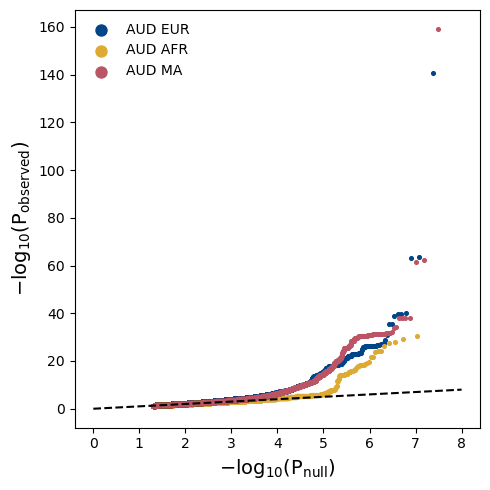

In [39]:
# make QQ plot
savefig = False
outf = "/ess/p33/cluster/users/alexeas/aud_gwas/meta/scripts/generic-metal/qq.aud.freeze_June2022.png" # output file name
colors = ['#004488', '#DDAA33', '#BB5566']
# create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5,5))

# add null line
ax.plot([0,8], [0,8], ls='--', color='k')

for i, (ss_id, df) in enumerate(df_dict.items()):
    qq_ax(df[pval_col_dict[ss_id]], ax, colors[i], ss_id) 
ax.set_xlabel(r"$\mathrm{-log_{10}(P_{null})}$", fontsize=14)
ax.set_ylabel(r"$\mathrm{-log_{10}(P_{observed})}$", fontsize=14)
    
ax.legend(markerscale=3, fontsize=10, frameon=False, loc='upper left')

plt.tight_layout()

if savefig: # set to True to save the figure
    plt.savefig(outf, facecolor='w')

In [38]:
# Calculate lambda_gc and lambda_1000
case_control = {"AUD EUR":(75583, 935130-75583), "AUD AFR":(20689, 70060-20689), "AUD MA": (102179, 1041450-102179)}

for ss_id in ("AUD EUR", "AUD AFR", "AUD MA"):
    print(ss_id)
    z2 = norm.ppf(0.5*df_dict[ss_id].P)**2
    lambda_gc = np.median(z2)/chi2.ppf(0.5,1)
    ncase, ncontrol = case_control[ss_id]
    lambda_1000 =  1 + (lambda_gc - 1)*(1/ncase + 1/ncontrol)*500
    print(f"    lambdaGC   = {lambda_gc:.3f}")
    print(f"    lambda1000 = {lambda_1000:.3f}")

AUD EUR
    lambdaGC   = 1.141
    lambda1000 = 1.001
AUD AFR
    lambdaGC   = 1.035
    lambda1000 = 1.001
AUD MA
    lambdaGC   = 1.102
    lambda1000 = 1.001
